In [1]:
# % matplotlib inline
import pysd
import matplotlib.pyplot as plt
import numpy as np

### Task (perform in a separate .py and .ipynb files)

Implement additionally the following logic:
1. Add the factor of a person who hunts both hares and lynxes in direct proportion to the size of their population (the corresponding coefficients $q_1$ and $q_2$ are parameters of the model).
2. Add a population of wolves hunting both lynxes and hares, with their natural birth rate (constant coefficient) and mortality depending on the total population of lynxes and hares (set the corresponding tabular function by yourself).
3. Add the opportunity for lynxes to feed on naturally deceased wolves (the scavenger principle). Make the corresponding coefficient $r$ a parameter of the model.

Output graphs of the population of all animals over time (you can scale the data), as well as calculate the mean and variance of the number of lynxes at the 100th step of the simulation when the parameters $q_1$, $q_2$ vary from $0.01$ to $0.1$ and $r$ from $0.1$ to $0.2$ (step for all paremeters is $0.01$).

In [2]:
model = pysd.load('my_model.py')
#all new formulas on lines 196-310, Integ values are changed and are at the bottom of the python file

### perform simulation with default parameters except q1, q2, r:
initial_wolves_population=150(if we use less, it will rise to the same number with these parameters anyway)
wolves_birth_rate = 10
lynx_deaths_by_wolves_efficiency = 0.01
hare_deaths_by_wolves_efficiency = 0.1
Mortality of Wolves takes input of numbers of hares and lynxes, takes weighted sum with coefficients 10 and 1(naturally there is around 50 more hares than lynxes), divides by area and performs tabular function(Death number is number of wolves multiplied by this coefficient):
y_points = [0.5, 0.45, 0.4, 0.35, 0.3, 0.25, 0.2, 0.15, 0.1, 0.05, 0.005]
x_points_wolves = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
y_points_wolves = [i / 2 for i in y_points]
tck_wolves = interpolate.splrep(x_points_wolves, y_points_wolves)

In [3]:
model.reload()
output = model.run(return_columns=['Lynx', 'Hare', 'Wolves'], params={"q1": 0.1, "q2": 0.1, "r": 0.1}, final_time=100)
#scaling
output['Lynx'] = output['Lynx'] * 100
output['Wolves'] = output['Wolves'] * 50

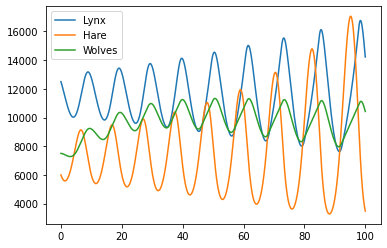

In [4]:
output.plot()
plt.show()

In [ ]:
model.reload()
output = model.run(return_columns=['Lynx', 'Hare', 'Wolves'], params={"q1": 0.1, "q2": 0.1, "r": 0.10}, final_time=100)
output['Lynx'] = output['Lynx'] * 100
output['Wolves'] = output['Wolves'] * 50

model.reload()
output2 = model.run(return_columns=['Lynx', 'Hare', 'Wolves'], params={"q1": 0.05, "q2": 0.1, "r": 0.1}, final_time=100)
output2['Lynx'] = output2['Lynx'] * 100
output2['Wolves'] = output2['Wolves'] * 50

model.reload()
output3 = model.run(return_columns=['Lynx', 'Hare', 'Wolves'], params={"q1": 0.1, "q2": 0.05, "r": 0.1}, final_time=100)
output3['Lynx'] = output3['Lynx'] * 100
output3['Wolves'] = output3['Wolves'] * 50

model.reload()
output4 = model.run(return_columns=['Lynx', 'Hare', 'Wolves'], params={"q1": 0.05, "q2": 0.05, "r": 0.1}, final_time=100)
output4['Lynx'] = output4['Lynx'] * 100
output4['Wolves'] = output4['Wolves'] * 50

model.reload()
output5 = model.run(return_columns=['Lynx', 'Hare', 'Wolves'], params={"q1": 0.1, "q2": 0.1, "r": 0.30}, final_time=100)
output5['Lynx'] = output5['Lynx'] * 100
output5['Wolves'] = output5['Wolves'] * 50


output.plot()
output2.plot()
output3.plot()
output4.plot()
output5.plot()
plt.show()

Difference between `q1` and `q2` Or low `q1` and `q2` don't change mean number of Lynxes and Hares that much, but it changes their amplitude over time, I guess it can be explained that if pray is reproduct too fast, predator need time to adjust, and that time is making pray to reproduct more and cause big amplitude, Also it changes both mean number of Wolves and variance of number of Wolves. As seen in the plots as q increases, variance, as r increases variance increases too.`r` has the same capabilities, but it changes amplitude of Wolves too.

In [ ]:
lynx_population = []

for q1 in np.linspace(0.01, 0.1, 10):
    print(f"{round(q1 * 1000 - 10)}%")
    for q2 in np.linspace(0.01, 0.1, 10):
        for r in np.linspace(0.1, 0.2, 11):
            model.reload()
            output = model.run(return_columns=['Lynx'], params={"q1": q1, "q2": q2, "r": r}, final_time=100)#step or time???
            last_step = output.iloc[-1]
            lynx_population.append(last_step["Lynx"])

In [ ]:
f"Mean of Lynxes {np.mean(lynx_population)}, Variance of Lynxes {np.var(lynx_population)}"

In [ ]:
model.reload()
output = model.run(return_columns=['Lynx', 'Hare', 'Wolves'], params={"q1": 0.1, "q2": 0.1, "r": 0.1}, final_time=100)
output.plot()
output.iloc[-1]

In [ ]:
model.run(return_columns=['Lynx', 'Hare', 'Wolves'], params={"q1": 0.1, "q2": 0.1, "r": 0.1}, final_time=100).iloc[0]


In [16]:
model.run(return_columns=['Lynx', 'Hare', 'Wolves'], params={"q1": 0.1, "q2": 0.1, "r": 0.1}, final_time=100).iloc[0]


Lynx       125.0
Hare      6000.0
Wolves     150.0
Name: 0.0, dtype: float64